Your Name: Kieran Fitzmaurice

An interesting feature of strings is the phenomena of **standing waves**. Waves of wavelength $\lambda_n=2L/n$ reflect constructively off of each end of the string, producing a fixed spatial pattern. One way to create these standing waves is to drive one end of the string at a resonant frequency
$$\omega=\frac{\pi nv}{L}\,,$$
where $n$ is a positive integer.

We've already wrote some code to simulate a vibrating string, and it's a relatively small changed to add in a driving term of the form
$$y(0,t)=y_0\sin(\omega t)\qquad\mbox{and}\qquad v_y(0,t)=y_0\omega\cos(\omega t)\,.$$
However, there's a rather significant problem: the amplitude of the resulting wave grows without limit when driven at a resonant frequency!

- Simulate a string with length $L=1$ m, wave speed $v=10$ m/s, and driving amplitude $y_0=0.01$ m using the Crank-Nicolson method (the time-dependent boundary conditions make adapting the spectral method non-trivial, although I suspect it's possible). Start with the string horizontal and at rest, and drive one end of the string at one of its resonant frequencies for 10 seconds.


- Plot the shape of the string every tenth of a second for 10 seconds. A nice way to do this is to draw all of the plots on the same axes, with the parameter `alpha=0.2` (or any value between 0 and 1) added each of your plots to make them partially transparent. You should use the same color for every plot. The amplitude won't diverge in just 10 seconds, but you should see that it's growing linearly.

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

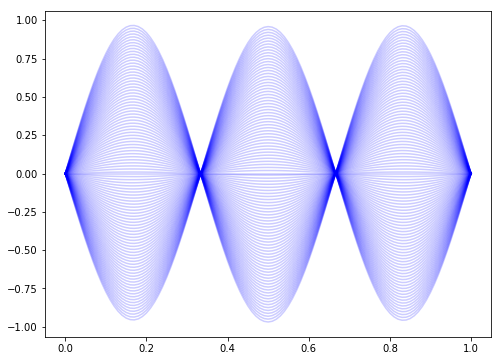

In [2]:
# Initial Conditions

L = 1.0
y0 = 0.01
v = 10.0

# Crank-Nicholson Method

N = 100
a = L/N
x = np.linspace(0, L, N+1)

h = 1e-4
tmax = 10 #run it longer this time
time = np.arange(0, tmax, h)

# Resonant Frequency
n = 3
w = np.pi*n*v/L

y = np.zeros(N+1)
y[0] = y0*np.sin(w*0)
vy = np.zeros(N+1)
vy[0] = y0*w*np.cos(w*0)

#tridiagonal matrix
c = 0.25*h**2*v**2/a**2
A2 = -c
A1 = 1 + 2*c
A = np.empty((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2

shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    y_old = y.copy()
    b = c*y[0:N-1] + (1-2*c)*y[1:N] + c*y[2:N+1] + h*vy[1:N]
    y[1:N] = solve_banded((1,1), A, b) #A y' = b
    y[0] = y0*np.sin(w*t)
    vy[1:N] += 0.5*h*v**2/a**2*(y[0:N-1] + y[2:N+1] - 2*y[1:N] + 
                            y_old[0:N-1] + y_old[2:N+1] - 2*y_old[1:N])
    vy[0] = y0*w*np.cos(w*t)
    
shape = np.array(shape)
    
plot_every = int(0.1//h)
frames = shape[0::plot_every]

fig = plt.figure(figsize = (8,6))

for f in frames:
    ax = plt.gca()
    ax.plot(x,f,'b',alpha = 0.2)

plt.show()

A more realistic treatment of this system is to add a damping term to the wave equation:
$\frac{\partial^2y}{\partial t^2}=v^2\frac{\partial^2 y}{\partial x^2} - b\frac{\partial y}{\partial t}\,$
where $b$ is the damping coefficient.

- Repeat the previous simulation with a damping coefficient of $b=10^{-5}$ m$^2$s$^{-2}$. This will require a much bigger change to your code, since you'll be using a different differential equation.
> Hint: Once you've finished applying the Crank-Nicolson method to the damped wave equation, you can check your solution by setting $b=0$ to verify that you get the same equations we used for the undamped wave equation.


- Plot the shape for the string every tenth of a second for 100 seconds. You should see that the solution stabilizes at finite amplitude.

## Solution:

$$\begin{align}
(-c)y_{i-1}^\prime &+ (1+2c)y_{i}^\prime + (-c)y_{i+1}^\prime \space=\space (c)y_{i-1} + (1-2c)y_{i}+(c)y_{i+1} + \frac{h}{2}\biggr(1 + \frac{1 - hb/2}{1 + hb/2}\biggl)\,v_{yi}\, \\
\end{align}$$
$$\begin{align}
c = \frac{h^2v^2}{4a^2(1 + hb/2)}
\end{align}$$

$$\begin{align}
v_{yi}^\prime = \big(\frac{1-hb/2}{1+hb/2}\big)v_{yi} + \frac{hv^2}{2a^2(1+hb/2)}\big[y_{i-1}^\prime + y_{i+1}^\prime - 2y_i^\prime + y_{i-1} + y_{i+1} - 2y_i\big]\,.
\end{align}$$


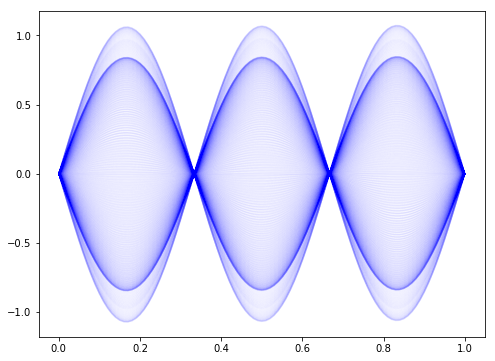

In [3]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Initial Conditions

L = 1
y0 = 0.01
v = 10.0

# Crank-Nicholson Method

N = 100
a = L/N
x = np.linspace(0, L, N+1)

h = 1e-3
tmax = 100 #run it longer this time
time = np.arange(0, tmax, h)

# Damping Coefficient
b = 1e-5

# Resonant Frequency
n = 3
w = np.pi*n*v/L

y = np.zeros(N+1)
y[0] = y0*np.sin(w*0)
vy = np.zeros(N+1)
vy[0] = y0*w*np.cos(w*0)

#tridiagonal matrix

c = h**2*v**2/(4*a**2*(1 + h*b/2))
A2 = -c
A1 = 1 + 2*c
A = np.empty((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2

shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    y_old = y.copy()
    vy_old = vy.copy()
    B = c*y[0:N-1] + (1-2*c)*y[1:N] + c*y[2:N+1] + (h/2)*(1 + (1-h*b/2)/(1+h*b/2))*vy[1:N]
    y[1:N] = solve_banded((1,1), A, B) #A y' = B
    y[0] = y0*np.sin(w*t)
    vy[1:N] = ((1-h*b/2)/(1+h*b/2))*vy_old[1:N] + (h*v**2/(2*a**2*(1 + h*b/2)))*(y[0:N-1] + y[2:N+1] - 2*y[1:N] + 
                                                                         y_old[0:N-1] + y_old[2:N+1] - 2*y_old[1:N])
    vy[0] = y0*w*np.cos(w*t)
    
shape = np.array(shape)
    
plot_every = int(0.1//h)
frames = shape[0::plot_every]

fig = plt.figure(figsize = (8,6))

for f in frames:
    ax = plt.gca()
    ax.plot(x,f,'b',alpha = 0.02)

plt.show()

- Modify your code so that the driving frequency is a linear function of time: $\omega=5t$ (with $\omega$ in rad/s and $t$ in seconds). Again plot the shape of the string every tenth of a second for the first 10 seconds. It will look pretty messy, but you should be able to identify some of the standing waves.

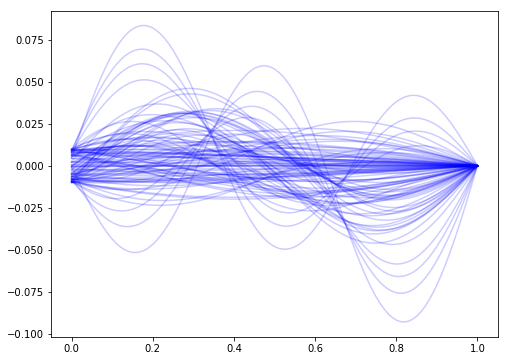

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Initial Conditions

L = 1
y0 = 0.01
v = 10.0

# Crank-Nicholson Method

N = 100
a = L/N
x = np.linspace(0, L, N+1)

h = 1e-4
tmax = 10 #run it longer this time
time = np.arange(0, tmax, h)

# Damping Coefficient
b = 1e-5

w = 0

y = np.zeros(N+1)
y[0] = y0*np.sin(w*0)
vy = np.zeros(N+1)
vy[0] = y0*w*np.cos(w*0)

#tridiagonal matrix

c = h**2*v**2/(4*a**2*(1 + h*b/2))
A2 = -c
A1 = 1 + 2*c
A = np.zeros((3, N-1))
A[0] = A2
A[1] = A1
A[2] = A2

shape = []
for i, t in enumerate(time):
    shape.append(y.copy())
    y_old = y.copy()
    vy_old = vy.copy()
    w = 5*t
    B = c*y[0:N-1] + (1-2*c)*y[1:N] + c*y[2:N+1] + (h/2)*(1 + (1-h*b/2)/(1+h*b/2))*vy[1:N]
    y[1:N] = solve_banded((1,1), A, B) #A y' = B
    y[0] = y0*np.sin(w*t)
    vy[1:N] = ((1-h*b/2)/(1+h*b/2))*vy_old[1:N] + (h*v**2/(2*a**2*(1 + h*b/2)))*(y[0:N-1] + y[2:N+1] - 2*y[1:N] + 
                                                                         y_old[0:N-1] + y_old[2:N+1] - 2*y_old[1:N])
    vy[0] = y0*w*np.cos(w*t)
    
shape = np.array(shape)
    
plot_every = int(0.1//h)
frames = shape[0::plot_every]

fig = plt.figure(figsize = (8,6))

for f in frames:
    ax = plt.gca()
    ax.plot(x,f,'b',alpha = 0.2)

plt.show()